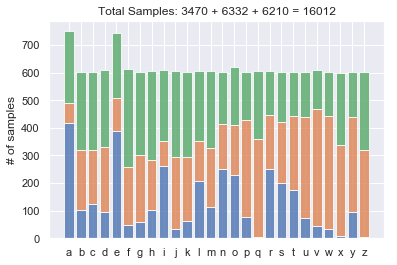

In [8]:
import os
import random
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()


path_project = "Documents/Learning/Projects/kido/"
path_figures = path_project + "figures/"


# Some stats
dirs_words = [
    "batch00_audioSplit", 
    "batch01_audioSplit", 
    "batch02_audioSplit"
]
dirs_randm = [
    "batch10_audioSplit",
    "batch11_audioSplit",
    "batch12_audioSplit__random",
    "batch13_audioSplit"    
]
dirs_alpha = [
    "batch20_audioSplit__alpha", 
    "batch21_audioSplit__alpha", 
    "batch22_audioSplit__alpha"
]


stats_words = [0] * 26
stats_randm = [0] * 26
stats_alpha = [0] * 26

for dir_ in dirs_words:
    path = path_project + dir_ + "/"
    files = os.listdir(path)
    splits = [file for file in files if file.endswith('.wav')]
    for chunk in splits:
        char = chunk[:-4].split('_')[-1]
        index = ord(char) - ord('a')
        stats_words[index] += 1
for dir_ in dirs_randm:
    path = path_project + dir_ + "/"
    files = os.listdir(path)
    splits = [file for file in files if file.endswith('.wav')]
    for chunk in splits:
        char = chunk[:-4].split('_')[-1]
        index = ord(char) - ord('a')
        stats_randm[index] += 1
for dir_ in dirs_alpha:
    path = path_project + dir_ + "/"
    files = os.listdir(path)
    splits = [file for file in files if file.endswith('.wav')]
    for chunk in splits:
        char = chunk[:-4].split('_')[-1]
        index = ord(char) - ord('a')
        stats_alpha[index] += 1

bottom1 = stats_words
bottom2 = [sum(x) for x in zip(stats_words, stats_randm)]
bottom3 = [sum(x) for x in zip(stats_words, stats_randm, stats_alpha)]
labels = [chr(i + ord('a')) for i in range(len(stats_alpha))]
x = [i for i in range(len(stats_alpha))]
plt.bar(x, stats_words, align='center', alpha=0.8)
plt.bar(x, stats_randm, bottom = bottom1, align='center', alpha=0.8)
plt.bar(x, stats_alpha, bottom = bottom2, align='center', alpha=0.8)
plt.xticks(x, labels)
plt.ylabel('# of samples')
sum_words = sum(stats_words)
sum_randm = sum(stats_randm)
sum_alpha = sum(stats_alpha)
plt.title(
    'Total Samples: {} + {} + {} = {}'.format(
        sum_words, 
        sum_randm, 
        sum_alpha,
        sum_words + sum_randm + sum_alpha))
#plt.savefig(path_figures + 'TotalSamples.png', dpi = 1000)
plt.show()

target = 600
for i in range(len(bottom3)):
    if bottom3[i] < target:
        print(chr(i + ord('a')), target - bottom3[i])

In [4]:
# Make some 10-char words only with the chars that are < 500
list_remaining = []
for i in range(len(bottom3)):
    if bottom3[i] < 500:
        balance = 500 - bottom3[i]
        for j in range(balance):
            list_remaining.append(chr(i + ord('a')))
            random.shuffle(list_remaining)
            
now = datetime.now()
remaining_file = path_project + "remaining_words_" + str(now) + ".txt"
with open(remaining_file, 'w') as the_file:
    count = 0
    while len(list_remaining) >= 10:
        word = ''
        count += 1
        for i in range(10):
            word += list_remaining.pop()
        the_file.write('{0:4}. {1:12s} {2:26s} \n'.format(count, word, ' '.join(word)))